--- First 5 rows of the Iris dataset ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


--- Data Split ---
Training data shape: (120, 4)
Testing data shape: (30, 4)


Model training complete.
The model has learned the prior probabilities and likelihood distributions from the data.


--- Model Evaluation ---
Accuracy: 100.00%
Accuracy is the proportion of correctly classified samples.

--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00  

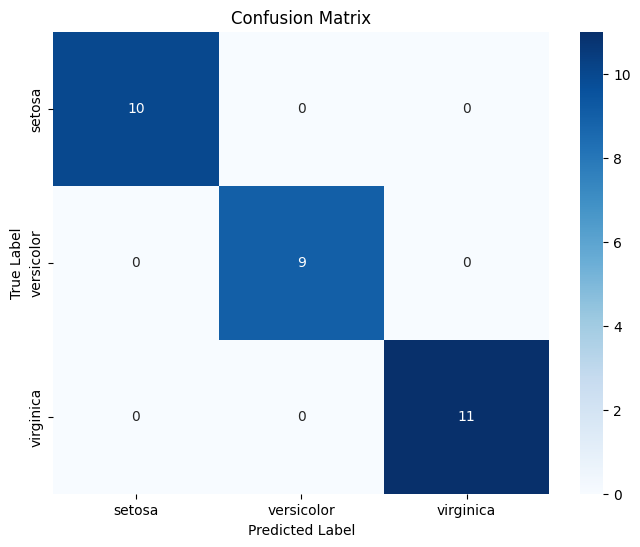

--- Example of a Single Prediction ---
Sample Features: [6.1 2.8 4.7 1.2]
True Species: versicolor
Predicted Species (based on highest posterior probability): versicolor

Posterior Probabilities calculated by the model:
  P(setosa | features) = 0.0000
  P(versicolor | features) = 0.9956
  P(virginica | features) = 0.0044


In [3]:
# --- Step 1: Import Necessary Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# --- Step 2: Load and Prepare the Dataset ---

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# For better understanding, let's create a Pandas DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
# Map target IDs to species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("--- First 5 rows of the Iris dataset ---")
print(df.head())
print("\n" + "="*50 + "\n")

# --- Step 3: Split Data into Training and Testing Sets ---
# We'll use an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Data Split ---")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print("\n" + "="*50 + "\n")


# --- Step 4: Implement Bayesian Decision Theory using Gaussian Naive Bayes ---

# Initialize the Gaussian Naive Bayes classifier
# This model assumes that features for each class follow a Gaussian (normal) distribution.
model = GaussianNB()

# Train the model on the training data
# During this step, the model calculates the prior probabilities (P(C_k)) and
# the mean and standard deviation for each feature for each class (to define the likelihood P(x|C_k)).
model.fit(X_train, y_train)

print("Model training complete.")
print("The model has learned the prior probabilities and likelihood distributions from the data.")
print("\n" + "="*50 + "\n")


# --- Step 5: Make Predictions on the Test Set ---

# Use the trained model to predict the class for the test data.
# For each sample in X_test, the model calculates the posterior probability for each class
# and picks the class with the highest probability.
y_pred = model.predict(X_test)

# You can also get the raw posterior probabilities for each class
posterior_probs = model.predict_proba(X_test)


# --- Step 6: Evaluate the Classifier's Performance ---

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.2%}")
print("Accuracy is the proportion of correctly classified samples.\n")

# Display the classification report
print("--- Classification Report ---")
# This report shows precision, recall, and F1-score for each class.
print(classification_report(y_test, y_pred, target_names=target_names))
print("\n" + "="*50 + "\n")


# Display the confusion matrix
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# --- Interpretation of a Prediction ---
print("--- Example of a Single Prediction ---")
sample_index = 0
sample_features = X_test[sample_index]
true_class = target_names[y_test[sample_index]]
predicted_class = target_names[y_pred[sample_index]]
probabilities = posterior_probs[sample_index]

print(f"Sample Features: {sample_features}")
print(f"True Species: {true_class}")
print(f"Predicted Species (based on highest posterior probability): {predicted_class}\n")
print("Posterior Probabilities calculated by the model:")
for i, class_name in enumerate(target_names):
    print(f"  P({class_name} | features) = {probabilities[i]:.4f}")
